# Análisis y Visualización de Datos

In [114]:
import io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [3]:
df

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.0,1360000.0,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.0
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301.0,NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,1325301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,5320,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),2200000.0,1800000.0,NaN,NaN,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,NaN,NaN,NaN,50,Hombre Cis,Sí,False,Senior,2200000.0
5192,5321,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,1600000.0,1300000.0,NaN,NaN,No,No recibo bono,...,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,23,Hombre Cis,Sí,False,Junior,1600000.0
5193,5322,Salta,Full-Time,Contractor,3000000.0,2400000.0,NaN,NaN,Menos de un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,28,Hombre Cis,Sí,False,Semi-Senior,3000000.0
5194,5323,Tierra del Fuego,Full-Time,Staff (planta permanente),5000000.0,4200000.0,NaN,NaN,Menos de un sueldo,Votado por decisión colectiva,...,NaN,NaN,NaN,NaN,58,Hombre Cis,No,False,Senior,5000000.0


In [92]:
list(df.columns)

['Unnamed: 0',
 'work_province',
 'work_dedication',
 'work_contract_type',
 'salary_monthly_BRUTO',
 'salary_monthly_NETO',
 'salary_in_usd',
 'salary_last_dollar_value',
 'salary_has_bonus',
 'salary_bonus_tied_to',
 'salary_inflation_adjustment',
 'salary_percentage_inflation_adjustment',
 'salary_month_last_inflation_adjustment',
 'salary_comparison_last_semester',
 'salary_benefit',
 'salary_satisfaction',
 'estas_buscando_trabajo',
 'pluriempleo',
 'company_main_activity',
 'profile_years_experience',
 'work_years_in_company',
 'work_years_in_current_position',
 'work_people_in_charge_of',
 'tools_platform',
 'tools_programming_languages',
 'tools_frameworks',
 'tools_data_bases',
 'tools_qa_testing',
 'company_employee_number',
 'work_work_modality',
 'company_days_in_the_office',
 'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
 'opcionalen_que_empresaorganizacion_estas_trabajando',
 'company_recommended',
 'tools_copilotchatgpt',
 'algo_que_quieras_dec

#### Análisis de Salarios de IT en Argentina

¿Cuantas filas hay en el dataset?

In [4]:
len(df)

5196

**¿Cuánto cobran las personas que trabajan en el área de IT en Argentina?**. 
Este será el punto de partida para el análisis del conjunto de datos. 

In [5]:
salary = 'salary_monthly_NETO'

Vamos a calcular la estadística descriptiva básica de la columna:

In [6]:
df[salary].describe()

count    4.951000e+03
mean     1.072550e+10
std      7.545122e+11
min      4.000000e+00
25%      1.288264e+06
50%      1.916958e+06
75%      2.893500e+06
max      5.309001e+13
Name: salary_monthly_NETO, dtype: float64

In [28]:
print(f"Salario máximo: {df[salary].max():,.2f}")
print(f"Salario mínimo: {df[salary].min():,.2f}")

Salario máximo: 53,090,005,379,000.00
Salario mínimo: 4.00


Como vemos los salarios mínimos y máximos son datos totalmente extremos.

El mínimo puede ser:
- error de carga
- sueldos muy bajos (pasantías, part-time, datos mal declarados).

El máximo puede ser:
- un sueldo muy alto
- alguien que cargó el salario anual en vez del mensual
- un error de tipeo (le agregaron un 0 de más)
- pagos en otra moneda, etc.

Al tener valores irreales en el dataset, vamos a enfocarnos en realizar un análisis mas acotado

In [33]:
df_filtered = df[df[salary] <= 10_000_000]
len(df_filtered)

4924

Vamos a seguir la exploración a través de la visualización. El gráfico generado es un histograma de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

<function matplotlib.pyplot.show(close=None, block=None)>

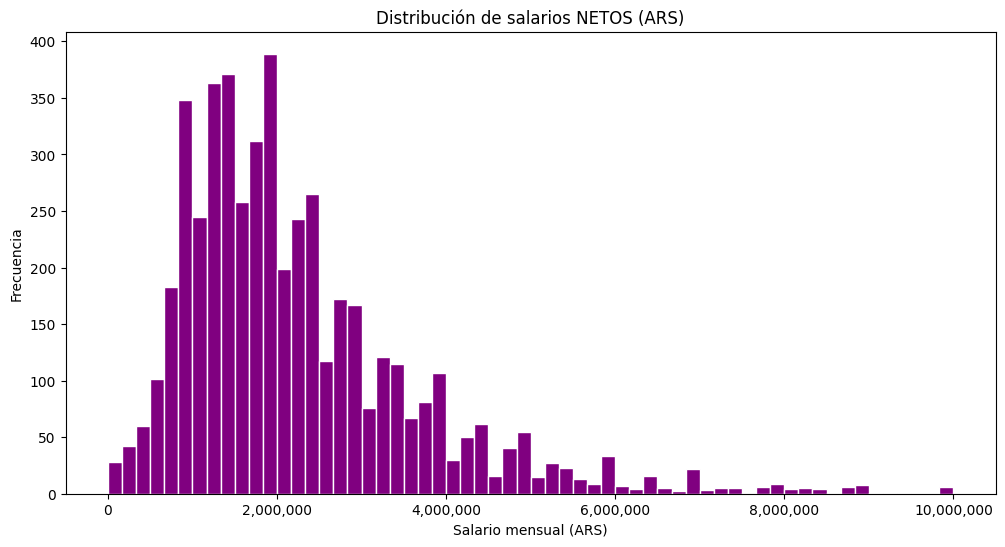

In [116]:
plt.figure(figsize=(12,6))

# Crear histograma
counts, bins, patches = plt.hist(df_filtered[salary], bins=60, edgecolor='white', color='purple')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('Distribución de salarios NETOS (ARS)')
plt.xlabel('Salario mensual (ARS)')
plt.ylabel('Frecuencia')
plt.show

In [59]:
mediana = df_filtered[salary].median()
print(f"Mediana: ARS {mediana:,.2f}) #  , → separador de miles y .2f → 2 decimales en formato de punto fijo.

Mediana: ARS 1,900,000.00


In [57]:
df_filtered[df_filtered[salary] == mediana]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
84,89,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2600000.0,1900000.0,Cobro parte del salario en dólares,NaN,Un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,47,Mujer Cis,No,True,Senior,2600000.0
109,114,Tierra del Fuego,Full-Time,Staff (planta permanente),2500000.0,1900000.0,Cobro parte del salario en dólares,Oficial,No,No recibo bono,...,Terminar encuesta,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,38,Hombre Cis,Sí,True,Semi-Senior,2500000.0
110,115,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2200000.0,1900000.0,Cobro todo el salario en dólares,1050,Un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,32,Hombre Cis,No,True,Junior,2200000.0
154,159,Buenos Aires,Full-Time,Staff (planta permanente),2511000.0,1900000.0,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Responder sobre guardias,"Sí, activa",15.0,Porcentaje de mi sueldo bruto,48,Hombre Cis,Sí,True,Senior,2511000.0
161,166,Salta,Full-Time,Staff (planta permanente),2200000.0,1900000.0,Cobro parte del salario en dólares,1017.5,No,No recibo bono,...,NaN,NaN,NaN,NaN,28,Mujer Cis,No,True,Semi-Senior,2200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,5176,Buenos Aires,Full-Time,Staff (planta permanente),2400000.0,1900000.0,NaN,NaN,No,No recibo bono,...,Terminar encuesta,"Sí, pasiva",0.0,Bruto,46,Prefiero no decir,Sí,False,Senior,2400000.0
5054,5182,Santa Fe,Full-Time,Staff (planta permanente),2500000.0,1900000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,26,Hombre Cis,No,False,Semi-Senior,2500000.0
5183,5312,Córdoba,Full-Time,Staff (planta permanente),2300000.0,1900000.0,NaN,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,29,Hombre Cis,No,False,Senior,2300000.0
5184,5313,Buenos Aires,Full-Time,Staff (planta permanente),2200000.0,1900000.0,NaN,NaN,De uno a tres sueldos,Performance individual,...,NaN,NaN,NaN,NaN,49,Hombre Cis,Sí,False,Senior,2200000.0


In [58]:
rango_inferior = mediana - 100_000
rango_superior = mediana + 100_000
near = df_filtered[(df_filtered[salary] >= rango_inferior) & (df_filtered[salary] <= rango_superior)]
print(f"Personas con salario cercano a la media: {len(near)}")
print(f"Sobre un total de: {len(df_filtered)} registros")

Personas con salario cercano a la media: 509
Sobre un total de: 4924 registros


La mayoría de los salarios NETOS en el sector IT se concentran entre aproximadamente 1,500,000 y 3,000,000 ARS mensuales.

A pesar de haber acotado los valores extremos para evitar que distorsionen el análisis, la distribución salarial mantiene una fuerte asimetría. Por eso, se considera más apropiado usar la mediana como medida representativa del salario central. **Mediana salarial de ARS 1,900,000**. 

In [63]:
df_filtered['seniority'].unique()

array(['Senior', 'Semi-Senior', 'Junior'], dtype=object)

##### Salarios según seniority

In [71]:
seniority = 'seniority'
df_filtered.groupby(seniority)[salary].agg(['count', 'median']).sort_values(by='median')

,count,median
seniority,,
Junior,875,1100000.00
Semi-Senior,1544,1690039.00
Senior,2505,2479375.22


In [76]:
seniority_mediana = df_filtered.groupby(seniority)[salary].median().sort_values()

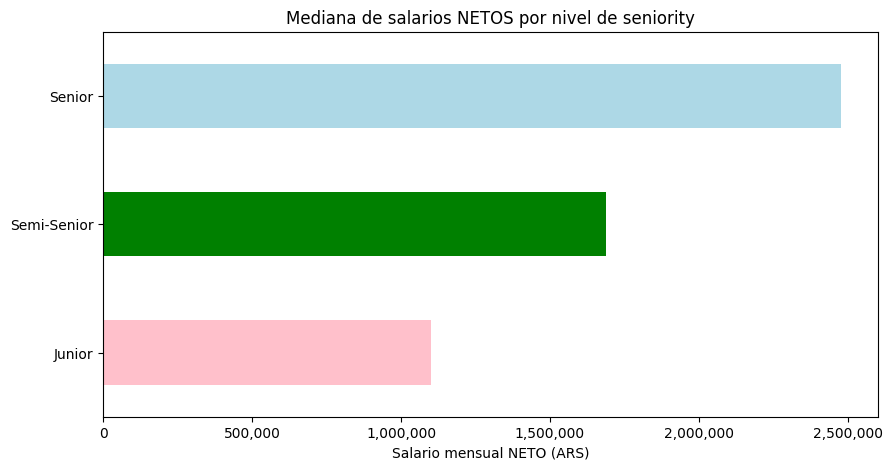

In [138]:
plt.figure(figsize=(10, 5))
colors = ['pink', 'green', 'lightblue'] 
seniority_mediana.plot(kind='barh', color=colors)

plt.title('Mediana de salarios NETOS por nivel de seniority')
plt.xlabel('Salario mensual NETO (ARS)')
plt.ylabel(None)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

Podemos observar que pasar de una categoría a otra implica aproximadamente un aumento del 50% en el salario (calculo relativo respecto al salario anterior)

In [123]:
role = 'company_main_activity'
df_filtered[role].unique()

array(['Manager / Director', 'Data Engineer', 'Developer',
       'Technical Support', 'Consultant', 'Architect', 'Designer',
       'SysAdmin / DevOps / SRE', 'Technical Leader',
       'BI Analyst / Data Analyst', 'Business Analyst', 'VP / C-Level',
       'Networking', 'Infosec', 'QA / Tester', 'Sales / Pre-Sales',
       'DBA (Database Administrator)', 'Recruiter', 'Data Scientist',
       'Engineer', 'HelpDesk', 'UX Designer', 'RPA', 'AI Engineer',
       'Scrum Master', 'UX Writer', 'UX Researcher',
       'No sé encuentra acá', 'Staff Engineer', 'Docente',
       'Functional Analyst', 'Finance', 'Fuera de IT', 'engineer',
       'Marketing', 'Mechanical engineer', 'Storage / Backup',
       'Pasé por varios puestos pero ninguno fijo', 'embedded engineer',
       'Dataentry', 'Smart contracts engineer', 'Configuration Analyst',
       'Middleware', 'Technical Writer', 'GeneXus Analyst',
       'Project Manager', 'Administrativo', 'I+D', 'Electronic Engineer',
       'Diseño + coo

Voy a seleccionar solamente algunas categorías para mostrar

In [161]:
roles_seleccionados = ['Manager / Director', 'Data Engineer', 'Developer',
       'Technical Support', 'Consultant', 'Architect',
       'SysAdmin / DevOps / SRE', 'Technical Leader',
       'BI Analyst / Data Analyst', 'Business Analyst', 'QA / Tester',
       'Database Administrator', 'Data Scientist', 'HelpDesk', 'UX Designer', 'AI Engineer',
       'Scrum Master', 'UX Researcher', 'Docente',
       'Functional Analyst', 'Fuera de IT', 'Project Manager']

df_roles = df_filtered[df_filtered[role].isin(roles_seleccionados)]

In [162]:
df_roles = df_roles.dropna(subset=[role, seniority, salary])

In [163]:
role_mediana = df_roles.groupby([role, seniority])[salary].median().reset_index()
orden_seniority = ['Junior', 'Semi-Senior', 'Senior']
role_mediana[seniority] = pd.Categorical(role_mediana[seniority], categories=orden_seniority, ordered=True)

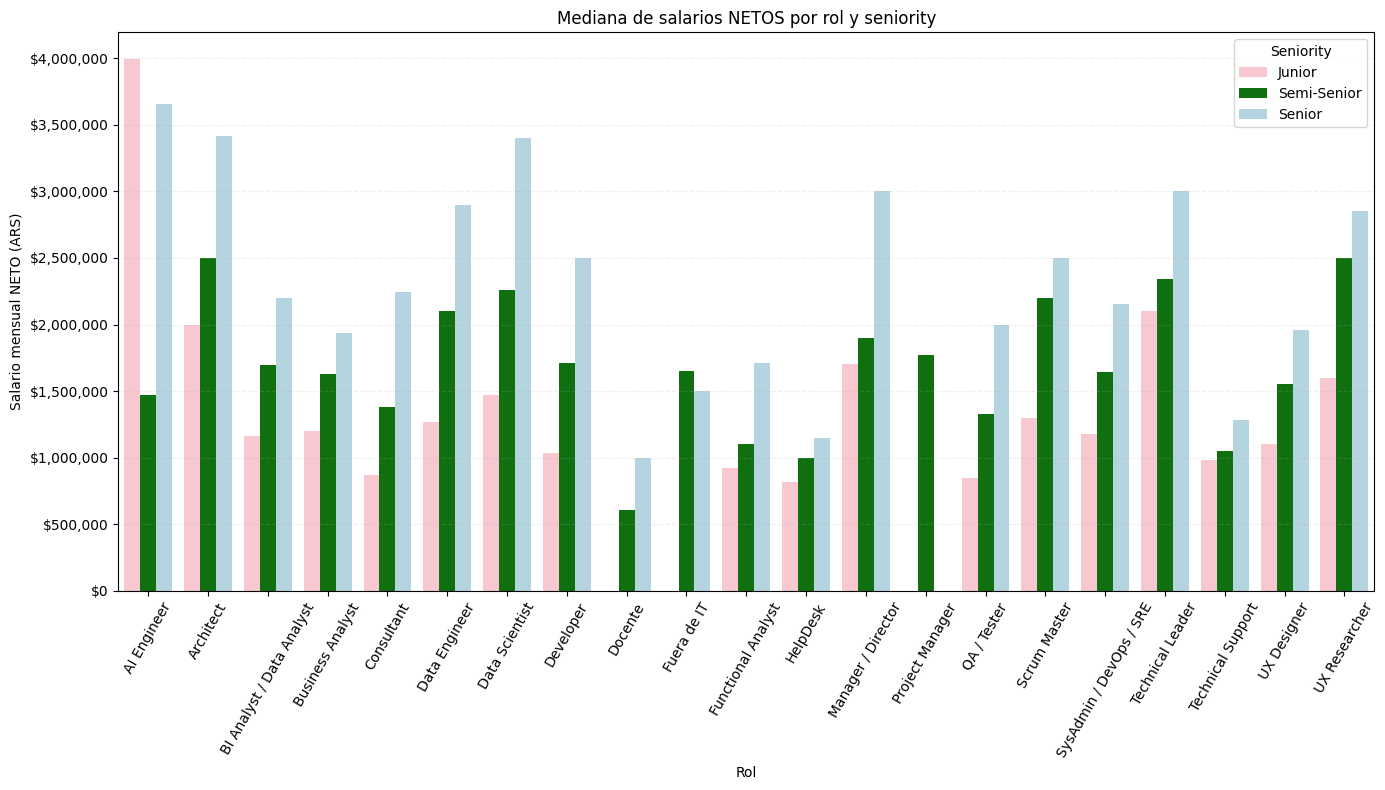

In [170]:
plt.figure(figsize=(14, 8))
sns. barplot(
    data=role_mediana,
    x=role,
    y=salary,
    hue=seniority,
    palette = ['pink', 'green', 'lightblue'] 
)

plt.title('Mediana de salarios NETOS por rol y seniority')
plt.ylabel('Salario mensual NETO (ARS)')
plt.xlabel('Rol')
plt.xticks(rotation = 60)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.legend(title='Seniority')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.2)
plt.show()

Si bien el gráfico muestra la mediana salarial segmentada por rol y seniority, hay ciertos casos llamativos que deben ser tomados con precaución. Por ejemplo, la mediana salarial de un/a AI Engineer Junior aparece por encima de otros niveles más altos, lo cual resulta atípico.

In [171]:
province = 'work_province'

In [172]:
df_filtered[province].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Córdoba', 'Buenos Aires',
       'Santa Fe', 'Mendoza', 'San Juan', 'Catamarca', 'Entre Ríos',
       'Tucumán', 'Tierra del Fuego', 'Neuquén', 'Chaco', 'Río Negro',
       'La Rioja', 'La Pampa', 'Salta', 'Chubut', 'San Luis', 'Misiones',
       'Jujuy', 'Santiago del Estero', 'Corrientes', 'Formosa',
       'Santa Cruz'], dtype=object)

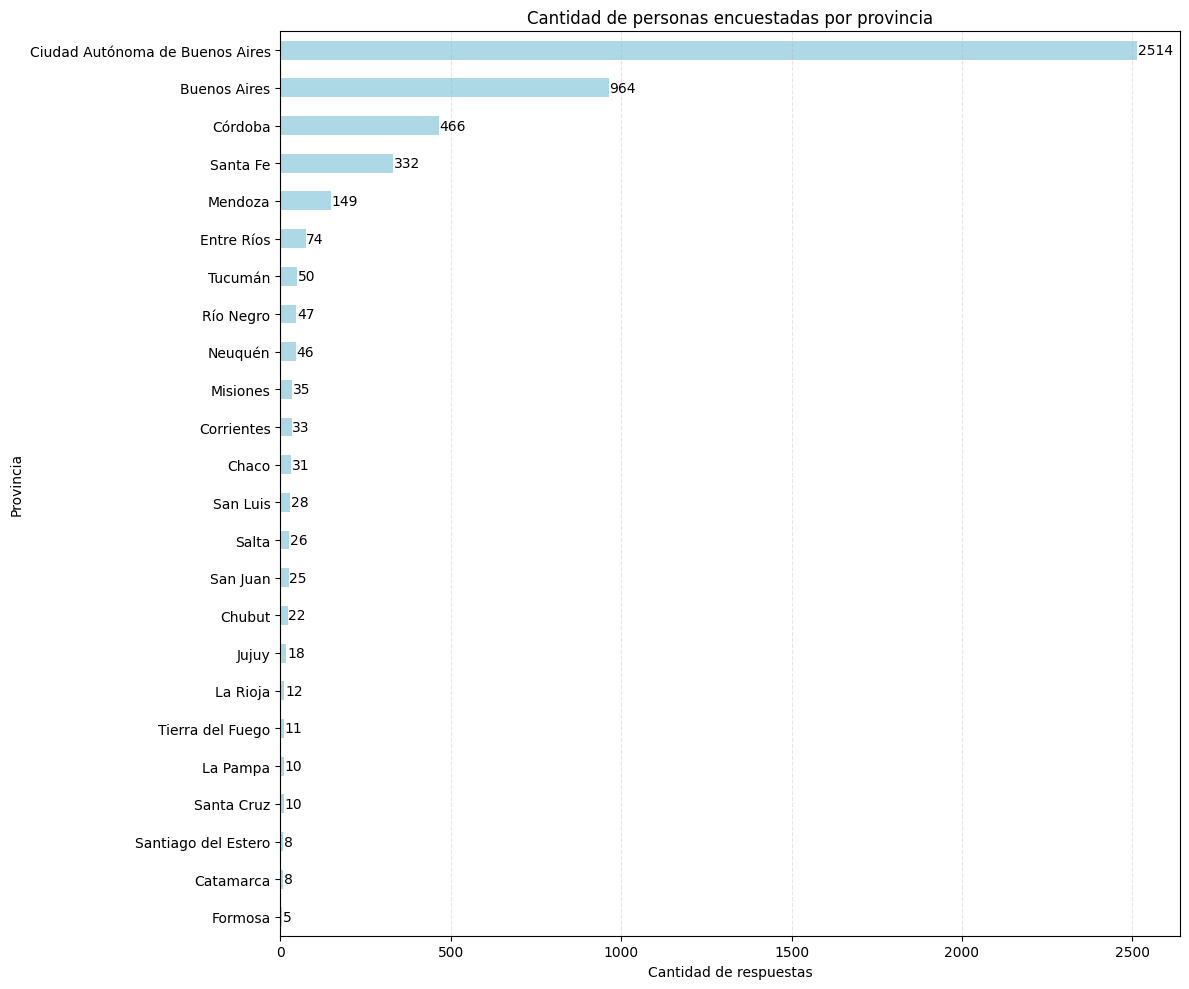

In [176]:
people_per_province = df_filtered[province].value_counts().sort_values()

plt.figure(figsize=(12, 10))
ax = people_per_province.plot(kind='barh', color='lightblue')

for i, (valor, nombre_prov) in enumerate(zip(people_per_province.values, people_per_province.index)):
    ax.text(valor + 2, i, f"{valor}", va='center')

plt.title('Cantidad de personas encuestadas por provincia')
plt.xlabel('Cantidad de respuestas')
plt.ylabel('Provincia')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()